In [ ]:
# Requirement
# pip install -r requirements.txt
# !pip install ultralytics
# !pip install roboflow

In [4]:
!nvidia-smi

Thu Jul 20 13:51:39 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
# importing frameworks and libraries
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display

In [7]:
display.clear_output()

In [8]:
!yolo checks

Ultralytics YOLOv8.0.138 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.3/78.2 GB disk)


In [10]:
# API key for dataset that prepared by RoboFlow 
from roboflow import Roboflow
rf = Roboflow(api_key="******")
project = rf.workspace("********").project("yolov8-glassesdetection")
dataset = project.version(3).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.138, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to YOLOv8-GlassesDetection-3 in yolov8:: 100%|██████████| 1436/1436 [00:01<00:00, 1050.69it/s]


In [11]:
# CLI training code snippet with Hyperparameter
!yolo task=detect mode=train model=yolov8x.pt data={dataset.location}/data.yaml epochs=30 imgsz=640 optimizer="SGD"

100% 131M/131M [00:00<00:00, 236MB/s]
Ultralytics YOLOv8.0.138 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/YOLOv8-GlassesDetection-3/data.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript

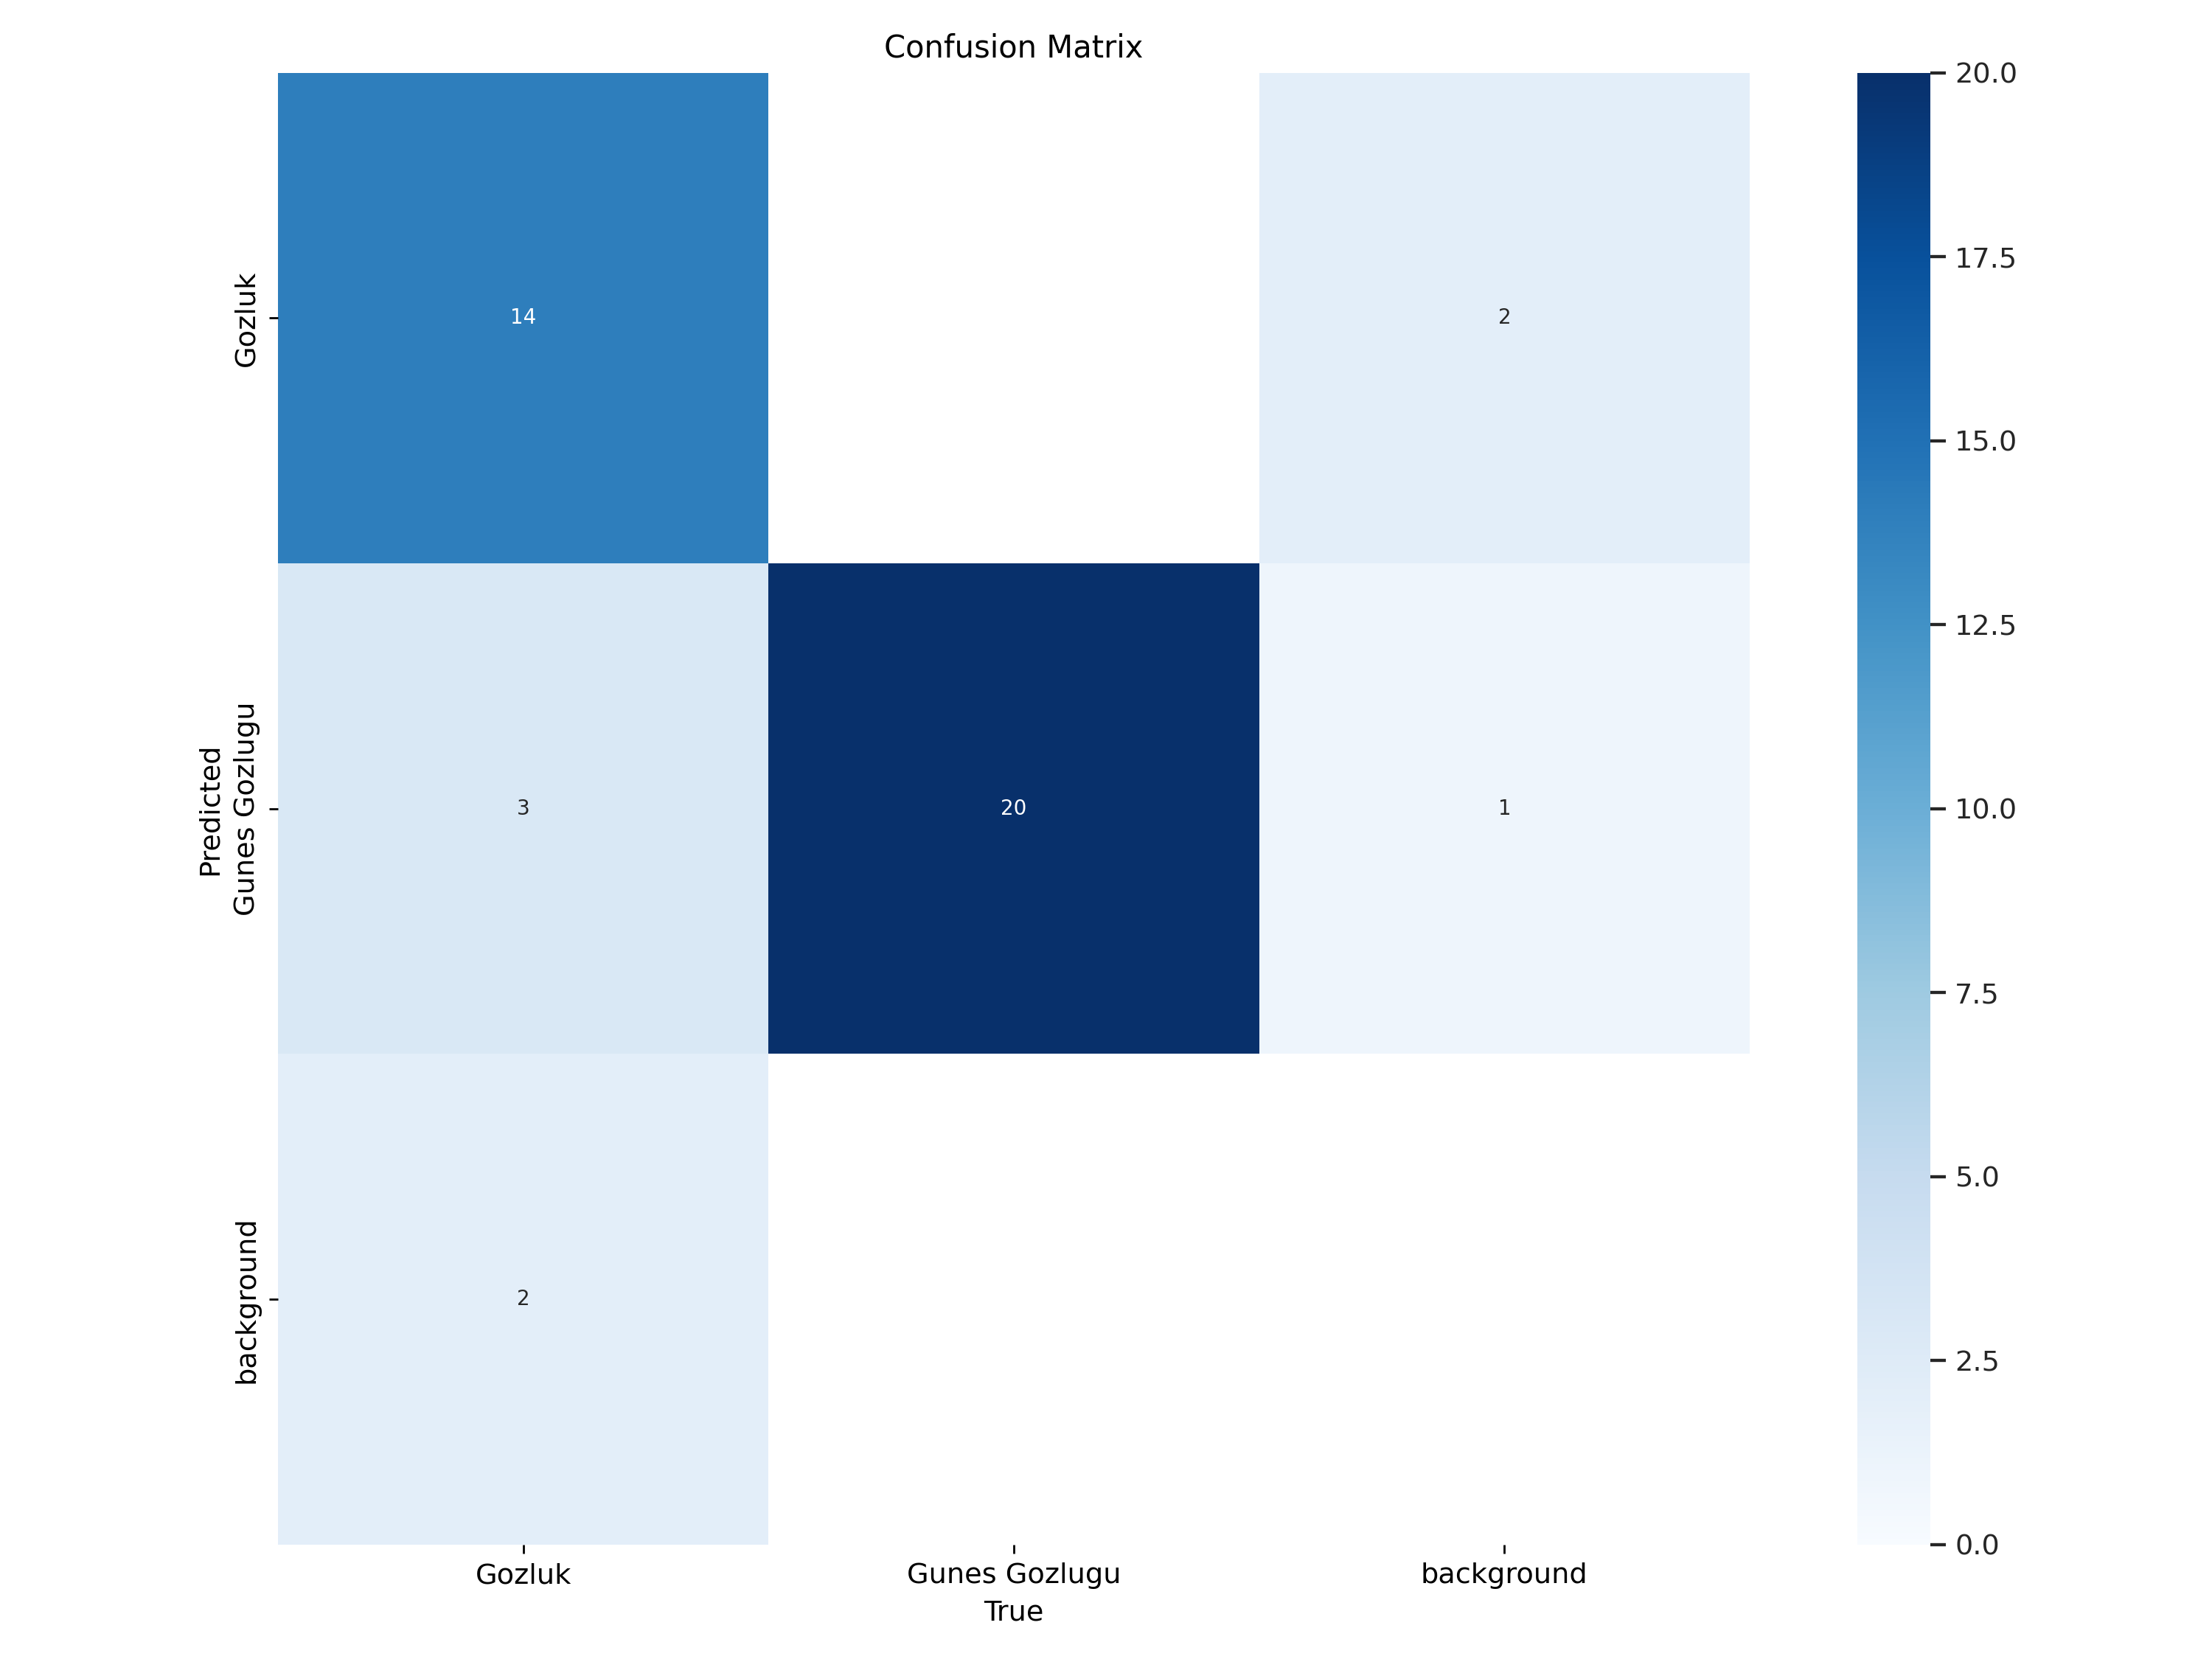

In [ ]:
# Confusion matrix for trained model
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

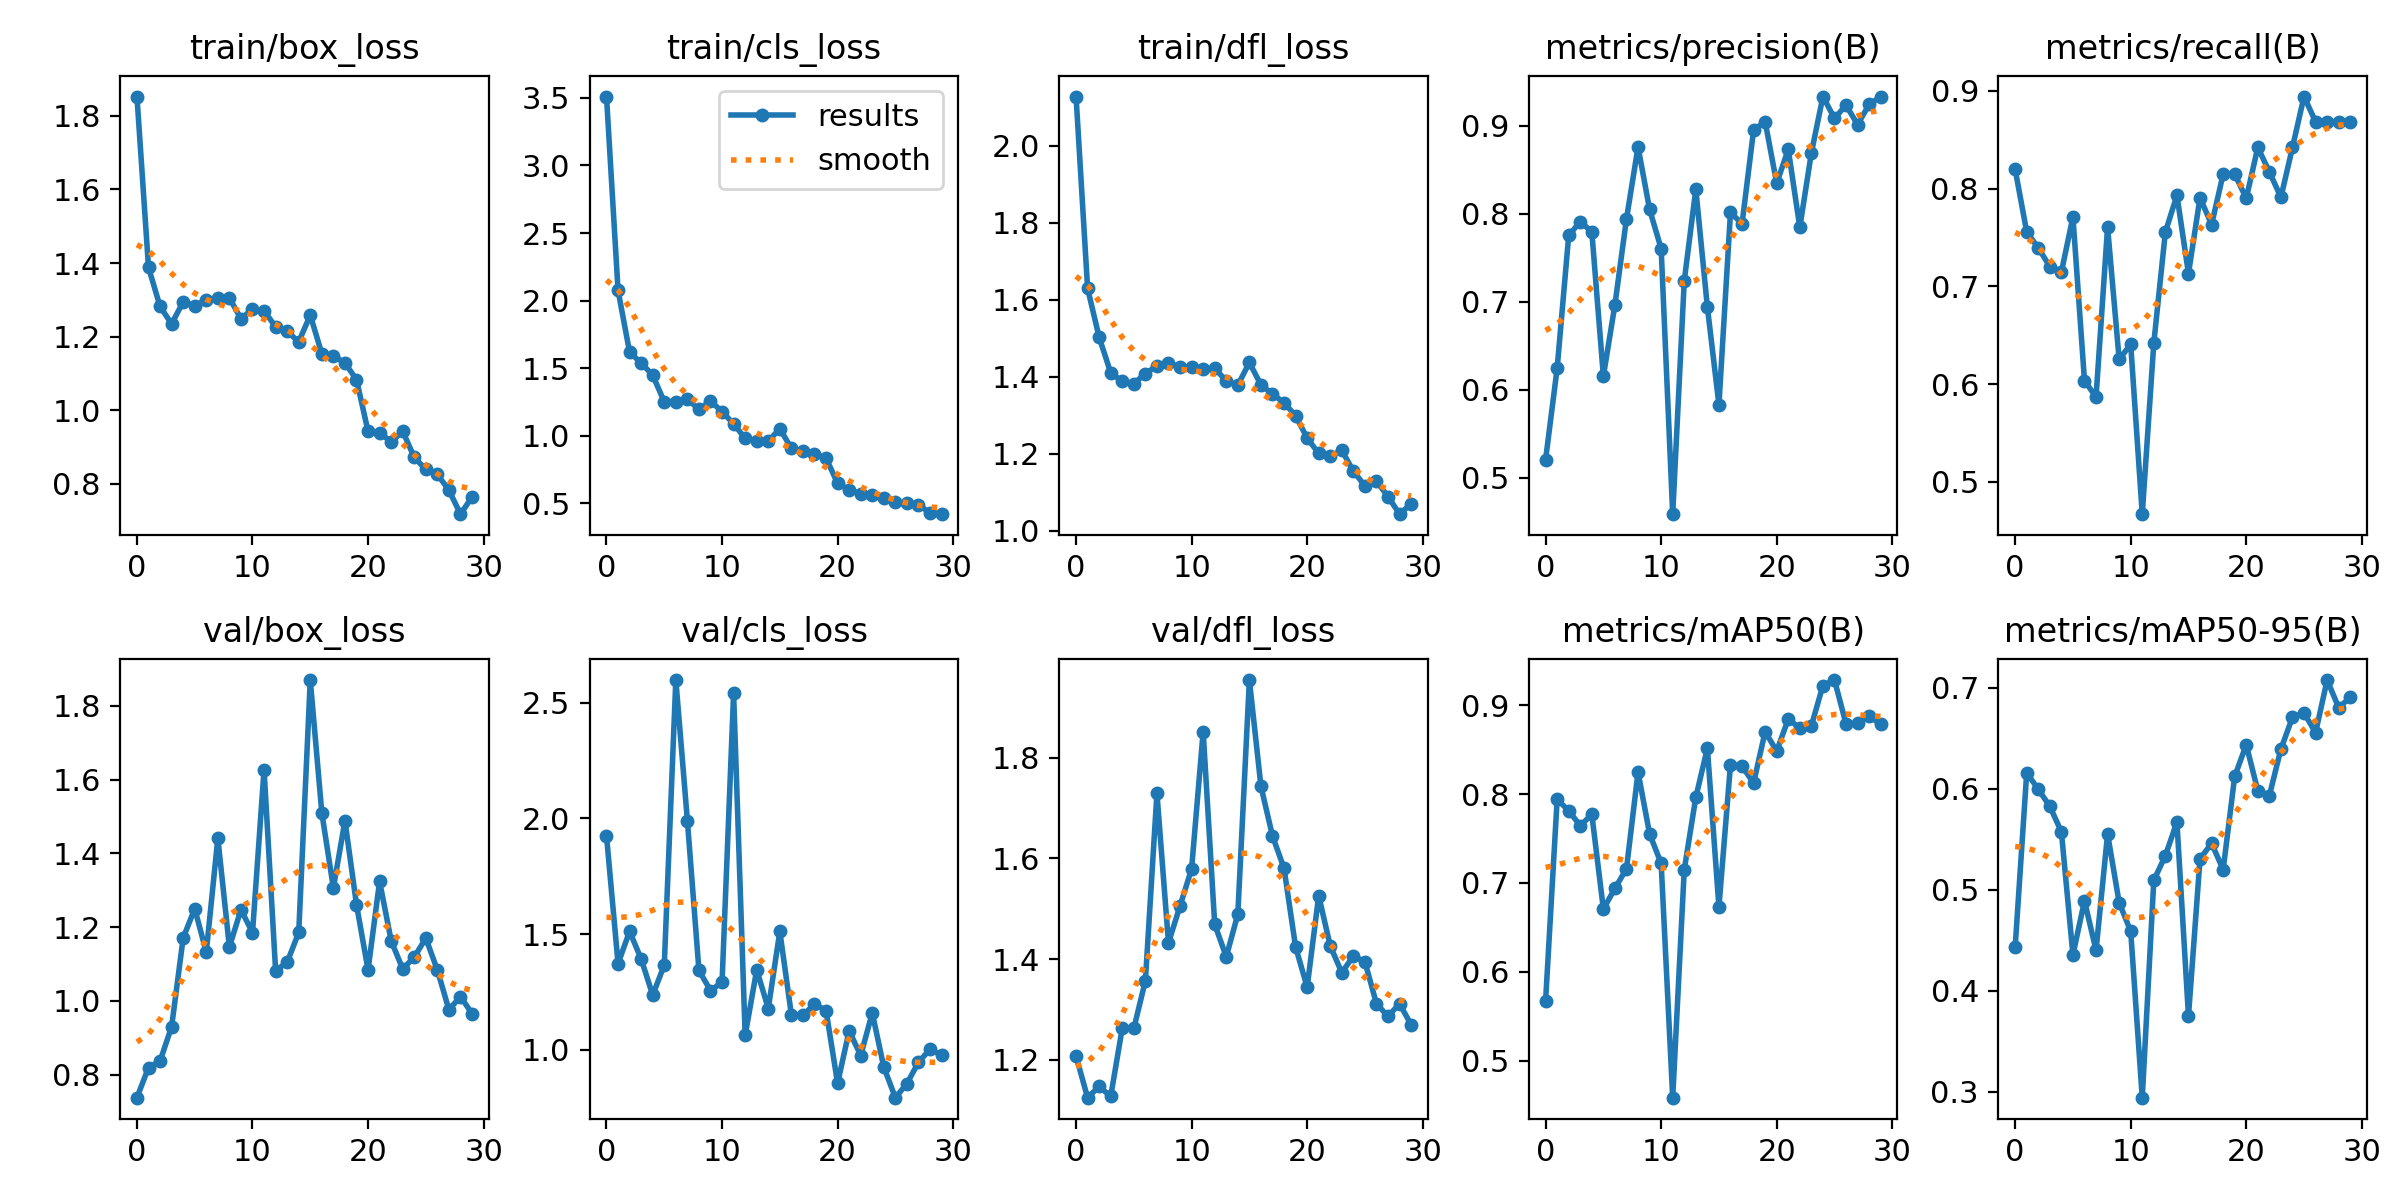

In [ ]:
# Evaluation metrics graphics for trained model
Image(filename=f'/content/runs/detect/train/results.png', width=600)

In [ ]:
# Evaluation metrics for trained model
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.137 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68125494 parameters, 0 gradients
val: Scanning /content/YOLOv8-GlassesDetection-1/valid/labels.cache... 37 images, 0 backgrounds, 0 corrupt: 100% 37/37 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:03<00:00,  1.16s/it]
                   all         37         39      0.901      0.868      0.878      0.704
                Gozluk         37         19      0.928      0.737       0.82       0.65
         Gunes Gozlugu         37         20      0.875          1      0.936      0.759
Speed: 5.4ms preprocess, 65.5ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/val


In [ ]:
# CLI validation code snippet
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save_txt=true save_conf=true

Ultralytics YOLOv8.0.137 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68125494 parameters, 0 gradients

image 1/37 /content/YOLOv8-GlassesDetection-1/test/images/glass-13-_jpg.rf.62da5bf34f2523af8caf871432131fc5.jpg: 640x640 1 Gozluk, 95.4ms
image 2/37 /content/YOLOv8-GlassesDetection-1/test/images/glass-15-_jpg.rf.b78073d28b531a7ef0b46f5f03a4d52f.jpg: 640x640 1 Gozluk, 55.0ms
image 3/37 /content/YOLOv8-GlassesDetection-1/test/images/glass-2-_jpg.rf.d49829938dde4b36c3276a5d4b0ca706.jpg: 640x640 1 Gozluk, 54.6ms
image 4/37 /content/YOLOv8-GlassesDetection-1/test/images/glass-44-_jpg.rf.d3607fbeb189e5301b38cfb1ba45b1fe.jpg: 640x640 2 Gozluks, 54.7ms
image 5/37 /content/YOLOv8-GlassesDetection-1/test/images/glass-45-_jpg.rf.bece776610169d2b9244b57cfbd38aeb.jpg: 640x640 1 Gozluk, 55.2ms
image 6/37 /content/YOLOv8-GlassesDetection-1/test/images/glass-47-_jpg.rf.9cc92b318425a3d9a688fe7ddb45dd37.jpg: 640x640 1 Gozluk, 52.3ms
image 7/37 /cont

In [ ]:
# CLI prediciton code snippet for test phase
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save_txt=true save_conf=true

Ultralytics YOLOv8.0.137 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68125494 parameters, 0 gradients

image 1/37 /content/YOLOv8-GlassesDetection-1/test/images/glass-13-_jpg.rf.62da5bf34f2523af8caf871432131fc5.jpg: 640x640 1 Gozluk, 97.3ms
image 2/37 /content/YOLOv8-GlassesDetection-1/test/images/glass-15-_jpg.rf.b78073d28b531a7ef0b46f5f03a4d52f.jpg: 640x640 1 Gozluk, 60.9ms
image 3/37 /content/YOLOv8-GlassesDetection-1/test/images/glass-2-_jpg.rf.d49829938dde4b36c3276a5d4b0ca706.jpg: 640x640 1 Gozluk, 56.6ms
image 4/37 /content/YOLOv8-GlassesDetection-1/test/images/glass-44-_jpg.rf.d3607fbeb189e5301b38cfb1ba45b1fe.jpg: 640x640 2 Gozluks, 55.1ms
image 5/37 /content/YOLOv8-GlassesDetection-1/test/images/glass-45-_jpg.rf.bece776610169d2b9244b57cfbd38aeb.jpg: 640x640 1 Gozluk, 55.1ms
image 6/37 /content/YOLOv8-GlassesDetection-1/test/images/glass-47-_jpg.rf.9cc92b318425a3d9a688fe7ddb45dd37.jpg: 640x640 1 Gozluk, 54.5ms
image 7/37 /cont

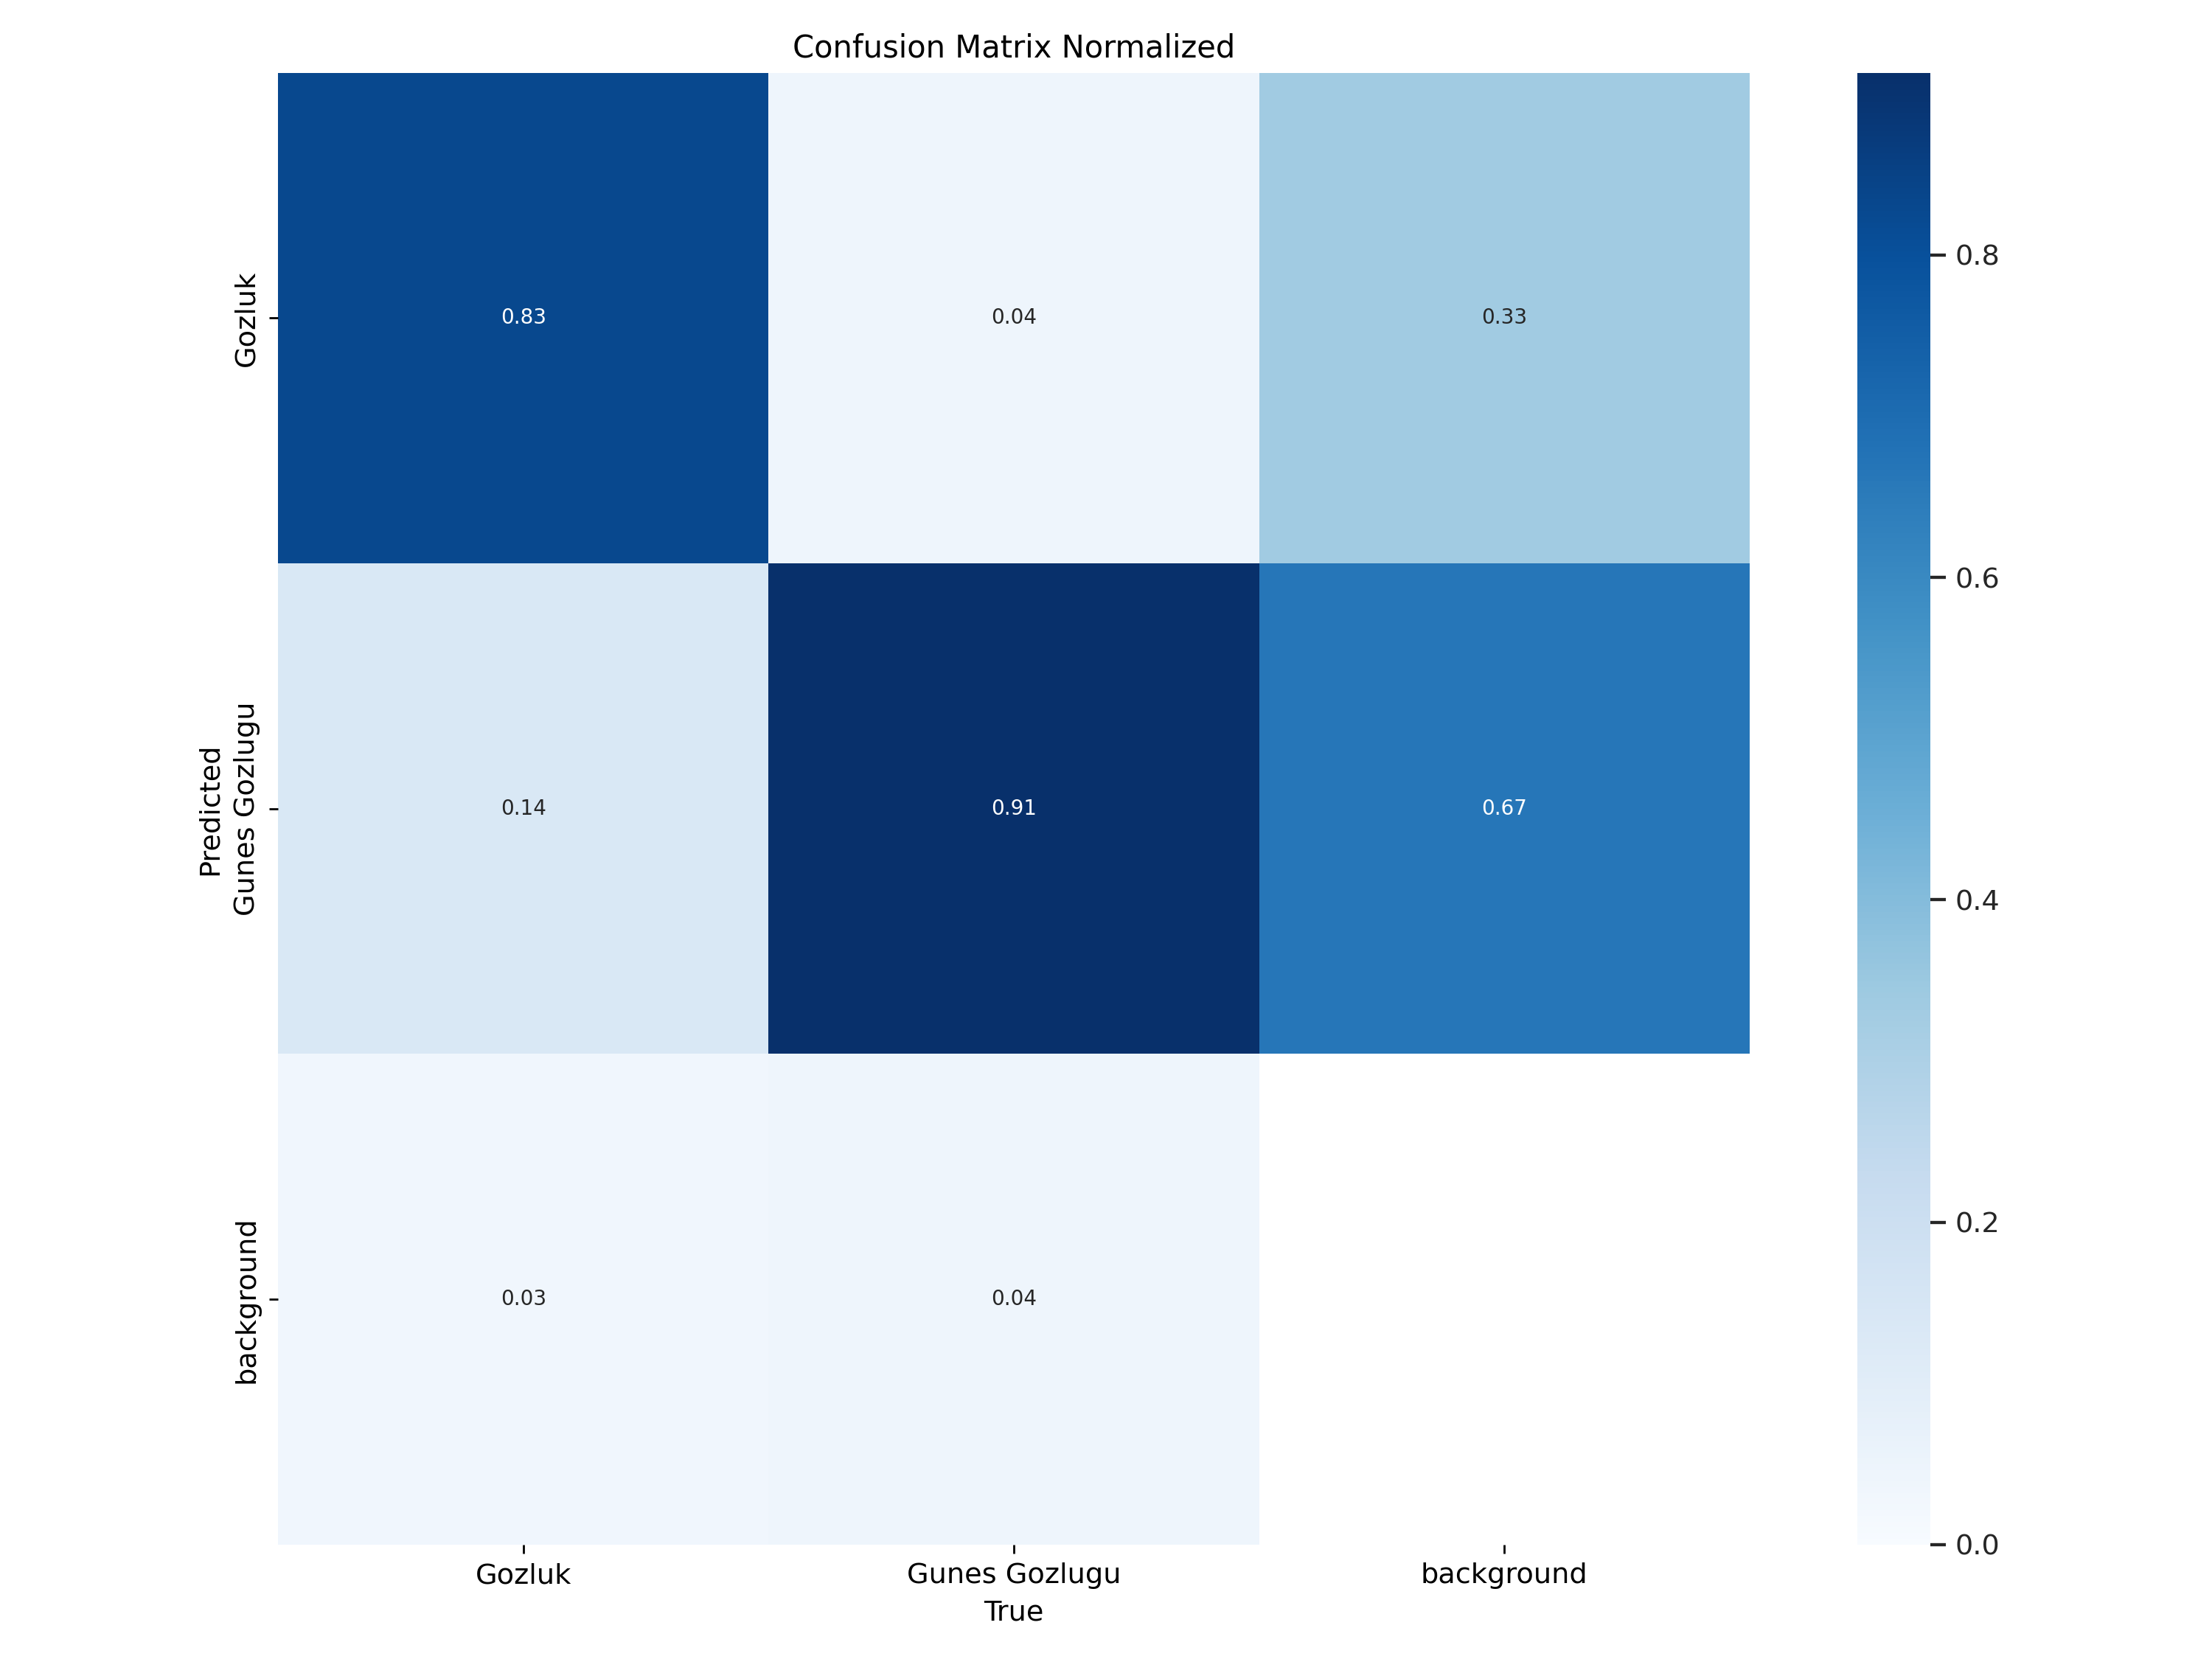

In [16]:
Image(filename=f'/content/runs/detect/train/confusion_matrix_normalized.png', width=600)

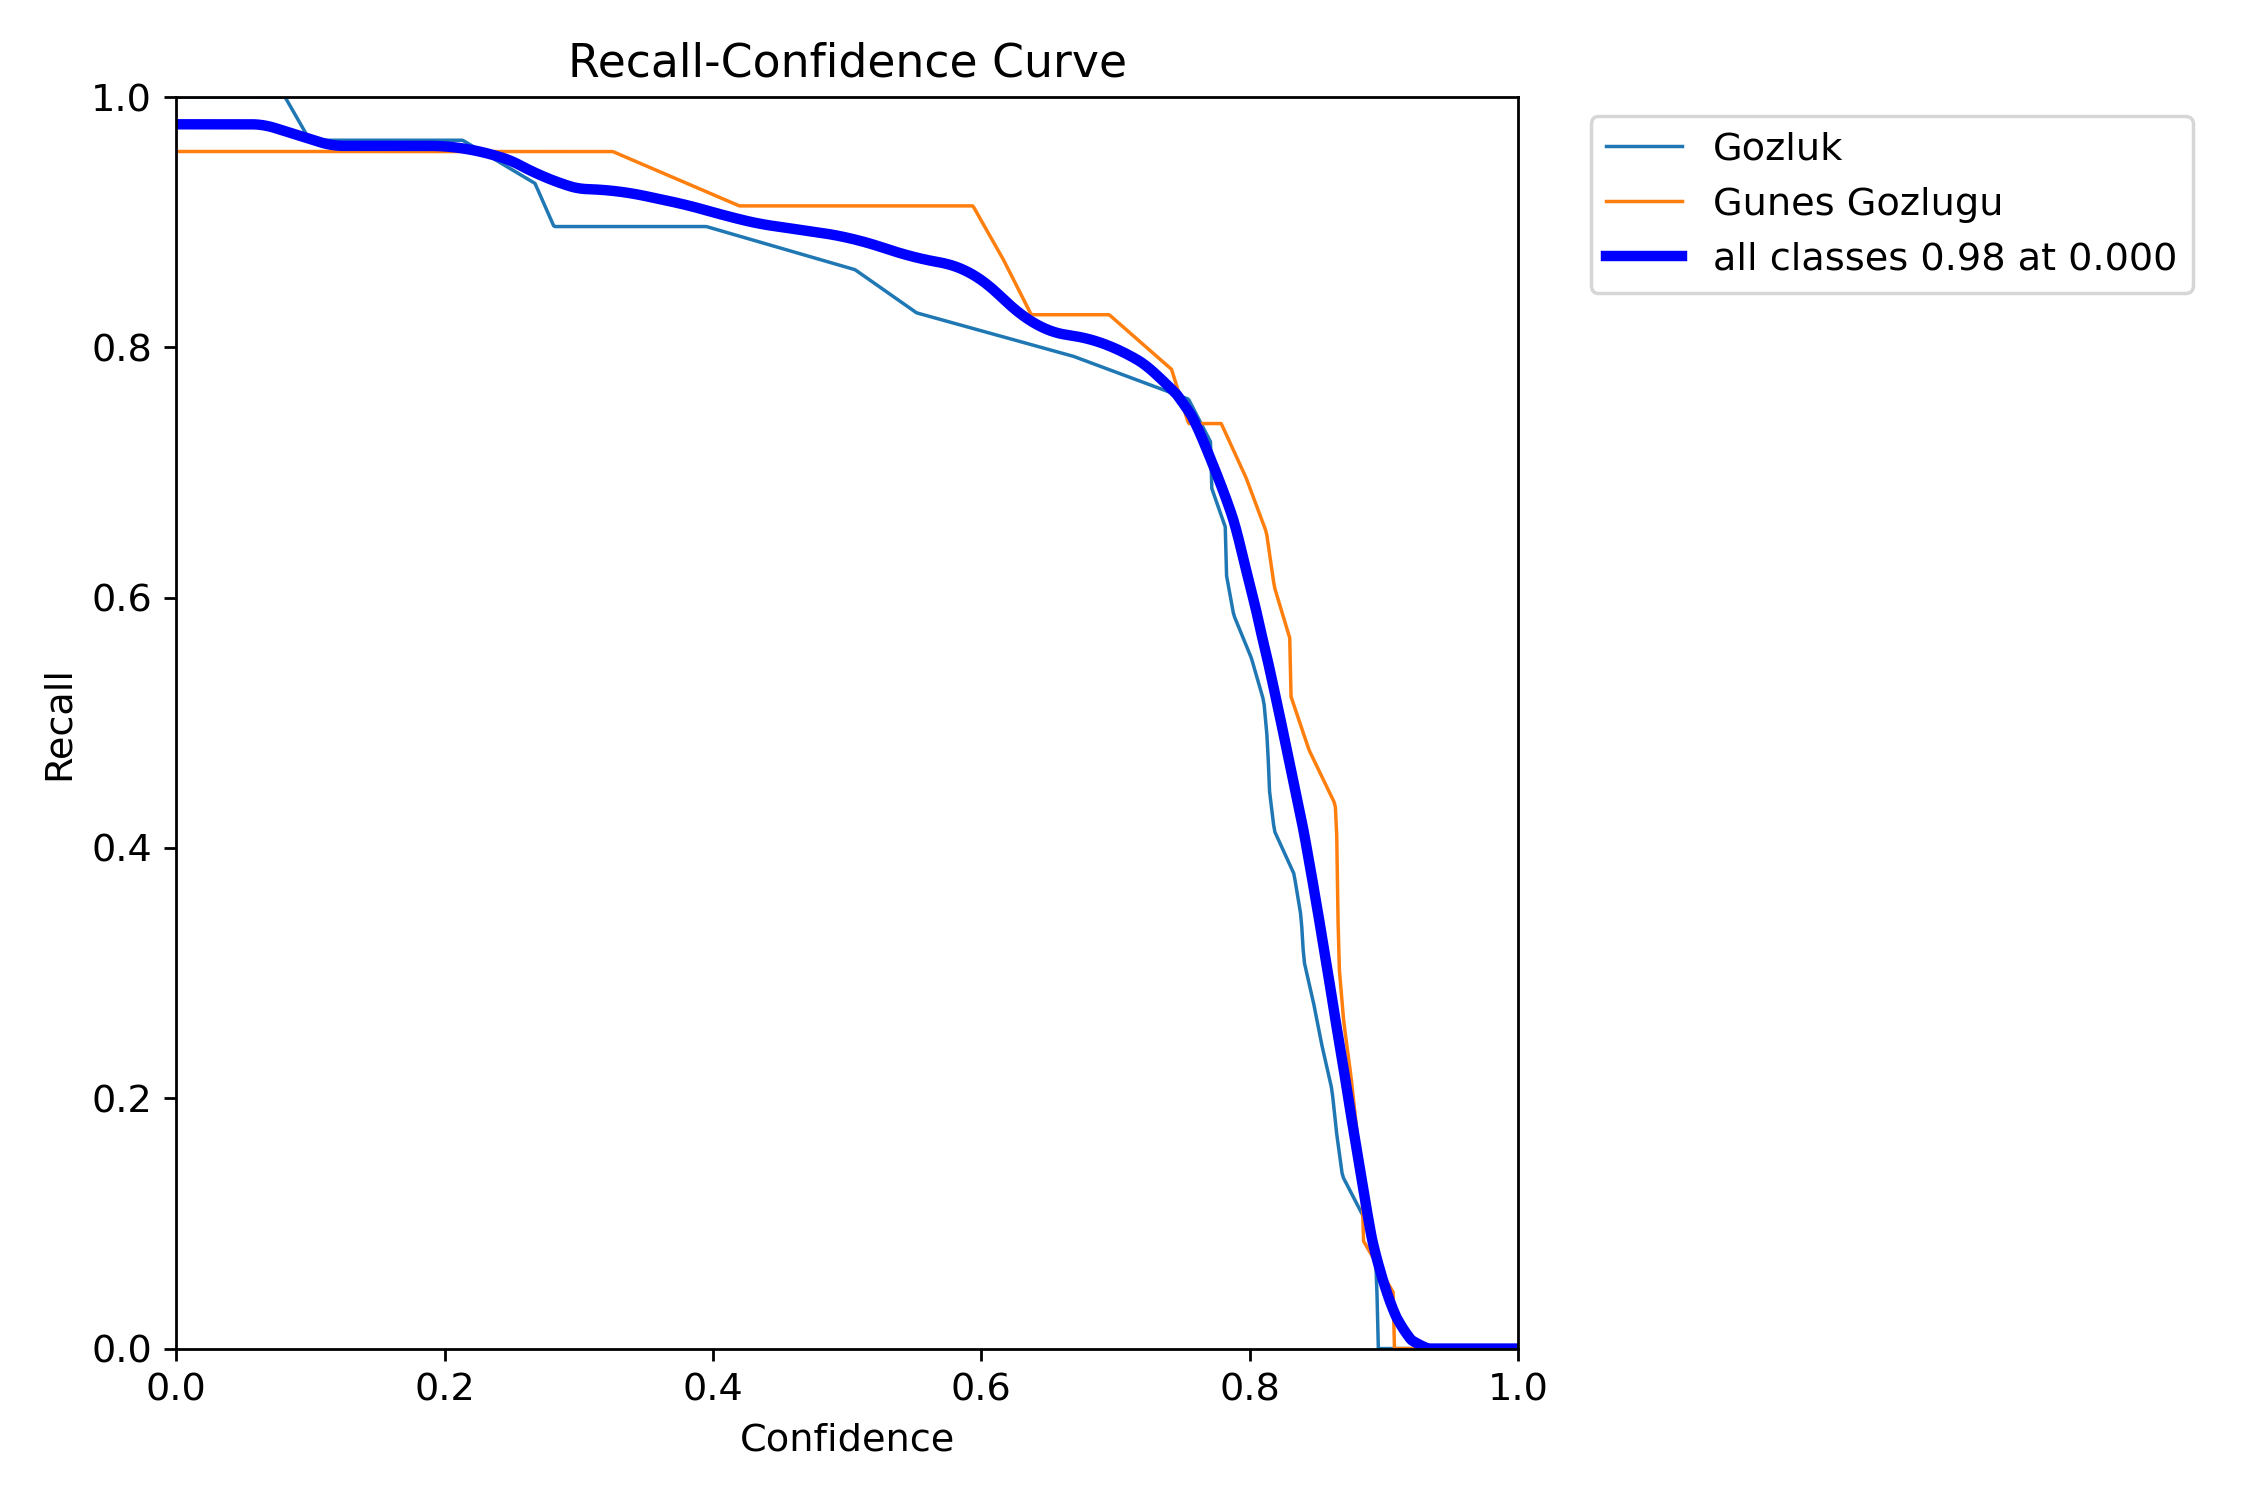

In [17]:
Image(filename=f'/content/runs/detect/train/R_curve.png', width=600)

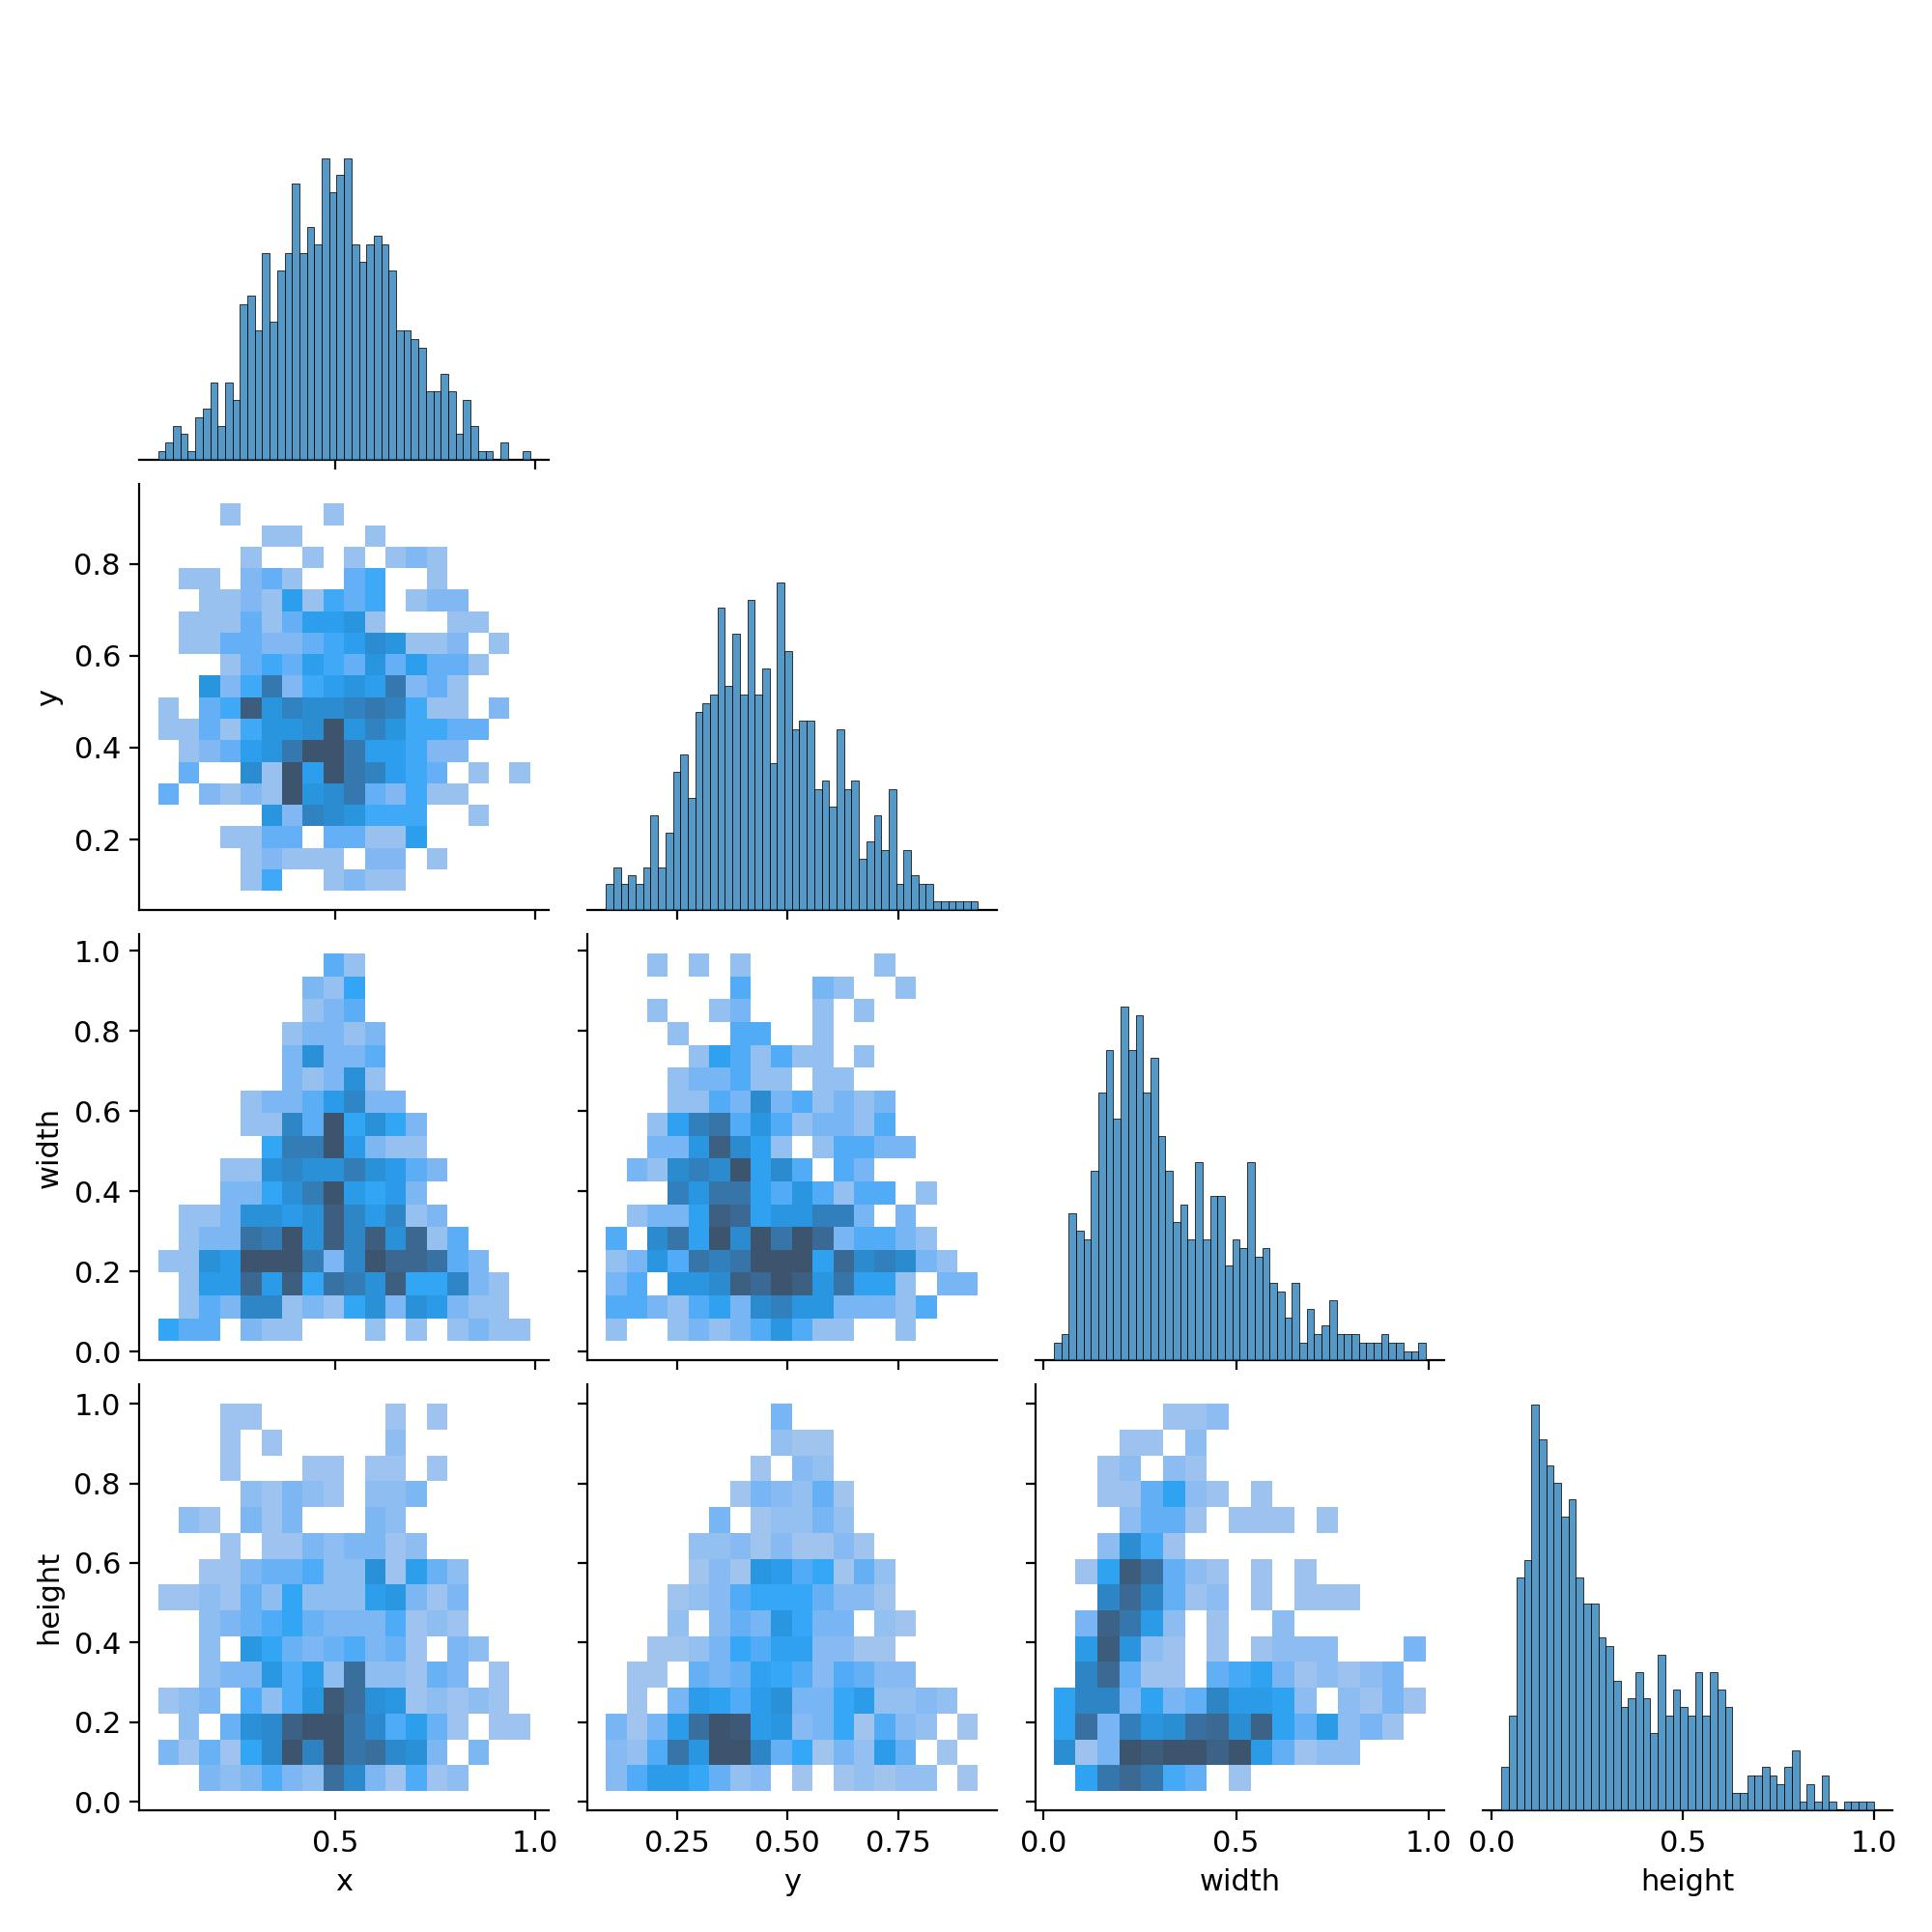

In [18]:
Image(filename=f'/content/runs/detect/train/labels_correlogram.jpg', width=600)